In [1]:
from shapely.geometry import Polygon

In [2]:
polygon = Polygon(
    [(-84.237756, 33.904859), (-84.237756, 34.090426),
     (-83.833011, 34.090426), (-83.833011, 33.904859),
     (-84.237756, 33.904859)
    ])

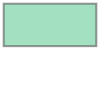

In [3]:
polygon

In [4]:
polygon2 = Polygon(
    [(-84.257756, 33.754859), (-84.297756, 33.904859), (-84.257756, 34.054859),
     (-83.787756, 34.154859),
     (-83.317756, 34.054859), (-83.287756, 33.904859), (-83.317756, 33.754859),
     (-83.787756, 33.654859),
    ])

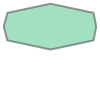

In [5]:
polygon2

In [6]:
from pyspark.sql import SparkSession

from geospark.register import upload_jars
from geospark.utils import GeoSparkKryoRegistrator, KryoSerializer

upload_jars()

spark = SparkSession.\
    builder.\
    master("local[*]").\
    appName("geospark-study").\
    config("spark.serializer", KryoSerializer.getName).\
    config("spark.kryo.registrator", GeoSparkKryoRegistrator.getName) .\
    getOrCreate()

In [7]:
from geospark.register import GeoSparkRegistrator
GeoSparkRegistrator.registerAll(spark)

True

In [18]:
from pyspark.sql.types import StructType
from pyspark.sql.types import StructField
from pyspark.sql.types import StringType

from geospark.sql.types import GeometryType

schema = StructType([
    StructField('name', StringType()),
    StructField('geometry', GeometryType())
])

In [19]:
dic1 = [{'name': 'square', 'geometry': polygon}]
df1 = spark.createDataFrame(dic1, schema)

In [20]:
dic2 = [{'name': 'octagon', 'geometry': polygon2}]
df2 = spark.createDataFrame(dic2, schema)

In [22]:
df1.registerTempTable('square')
df2.registerTempTable('octagon')

In [25]:
intersectioned = spark.sql("""
    SELECT
        ST_Intersection(square.geometry, octagon.geometry)
    FROM 
        square, 
        octagon
""")

In [27]:
intersectioned.show()

AnalysisException: 'Detected implicit cartesian product for INNER join between logical plans\nProject [geometry#24]\n+- LogicalRDD [name#23, geometry#24], false\nand\nProject [geometry#28]\n+- LogicalRDD [name#27, geometry#28], false\nJoin condition is missing or trivial.\nEither: use the CROSS JOIN syntax to allow cartesian products between these\nrelations, or: enable implicit cartesian products by setting the configuration\nvariable spark.sql.crossJoin.enabled=true;'